In [1]:
import sympy as sym         # 调入符号计算库
from sympy import symbols   # 符号变量声明
from sympy.plotting import plot
x = symbols('x')            # x 是符号变量

In [2]:
f = sym.sin(sym.pi * x)
f

sin(pi*x)

In [23]:
n = 5
a = 0
b = 1
phi = sym.zeros(1, n)
phi

Matrix([[0, 0, 0, 0, 0]])

In [24]:
for i in range(n):
    phi[i] = sym.legendre(i, (2*x - (b + a))/(b - a))
phi

Matrix([[1, 2*x - 1, 3*(2*x - 1)**2/2 - 1/2, -3*x + 5*(2*x - 1)**3/2 + 3/2, 35*(2*x - 1)**4/8 - 15*(2*x - 1)**2/4 + 3/8]])

In [25]:
G = sym.zeros(n)
for i in range(n):
    for j in range(n):
        # 顺便验证了正交性
        G[i, j] = sym.integrate(phi[i] * phi[j], (x, a, b))
G

Matrix([
[1,   0,   0,   0,   0],
[0, 1/3,   0,   0,   0],
[0,   0, 1/5,   0,   0],
[0,   0,   0, 1/7,   0],
[0,   0,   0,   0, 1/9]])

In [26]:
rhs = sym.zeros(n, 1)
for i in range(n):
    rhs[i] = sym.integrate(phi[i] * f, (x, a, b))
rhs

Matrix([
[                          2/pi],
[                             0],
[              -24/pi**3 + 2/pi],
[                             0],
[-360/pi**3 + 2/pi + 3360/pi**5]])

In [27]:
co = sym.zeros(n, 1)
for i in range(n):
    co[i] = rhs[i] / G[i,i]
co

Matrix([
[                             2/pi],
[                                0],
[               -120/pi**3 + 10/pi],
[                                0],
[-3240/pi**3 + 18/pi + 30240/pi**5]])

In [28]:
F = 0
for i in range(n):
    F = F + co[i] * phi[i]
F

(-120/pi**3 + 10/pi)*(3*(2*x - 1)**2/2 - 1/2) + (-3240/pi**3 + 18/pi + 30240/pi**5)*(35*(2*x - 1)**4/8 - 15*(2*x - 1)**2/4 + 3/8) + 2/pi

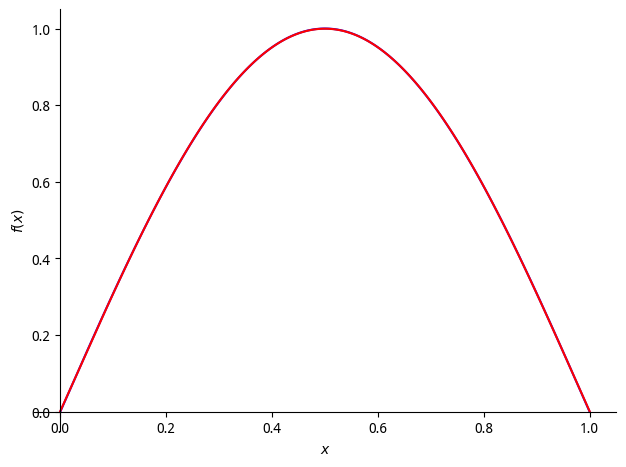

In [29]:
p1 = plot(f, (x, a, b), line_color='blue', show=False)
p2 = plot(F, (x, a, b), line_color='red', show=False)
p1.append(p2[0])
p1.show()

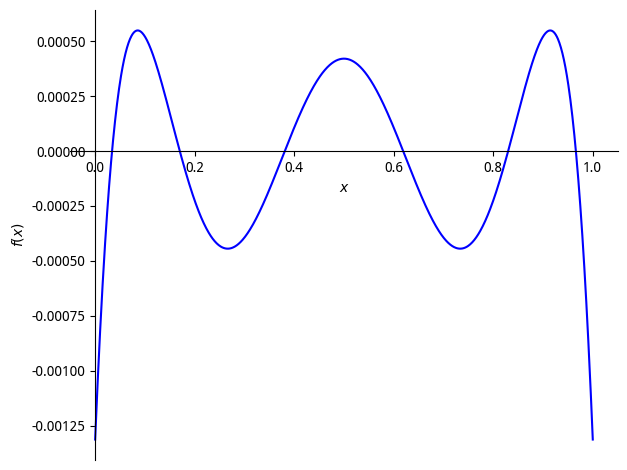

In [30]:
p1 = plot(f-F, (x, a, b), line_color='blue', show=False)
p1.show()

In [31]:
err = sym.sqrt(sym.integrate((F - f)**2, (x, a, b)))
err

sqrt(-1290240/pi**6 - 101606400/pi**10 - 60/pi**2 + 1/2 + 13440/pi**4 + 21772800/pi**8)

In [32]:
err.evalf()

0.000369025604229993